# Logistic Regression

Algoritmo de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es binaria o dicotómica, es decir, solo puede tener un valor de clase de una de las dos categorías posibles. El objetivo de la regresión logística es encontrar la mejor ecuación que describa la relación entre la variable dependiente y un conjunto de variables independientes.

## Dependencias, librerías y dataset

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('./aoe_data_clean.csv')

## Entrenamiento del modelo

### Visualización y preparación de los datos

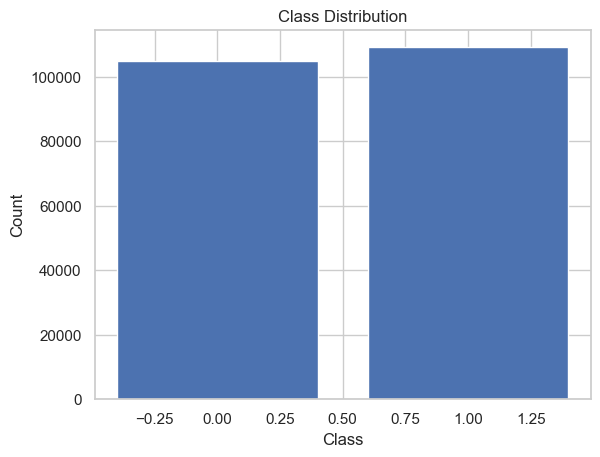

In [78]:
import matplotlib.pyplot as plt

# Count the number of instances for each class
class_counts = df['winner'].value_counts()

# Get the class labels and their counts
class_labels = class_counts.index
class_values = class_counts.values

# Plot the bar chart
plt.bar(class_labels, class_values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


#### Elo y duración de la partida

count    224599.000000
mean       1127.882065
std         234.031819
min         682.000000
25%         965.000000
50%        1063.000000
75%        1218.500000
max        2523.000000
Name: elo, dtype: float64


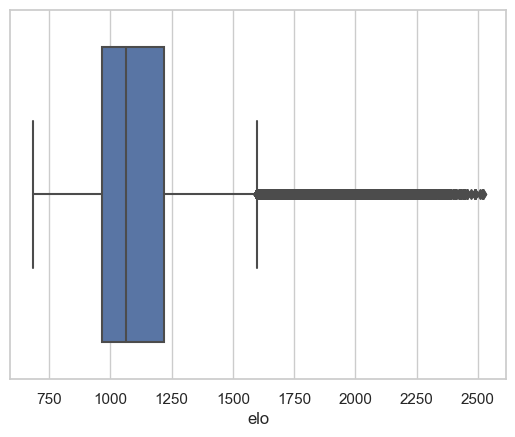

In [61]:
import seaborn as sns

# Bigotes

elo = df['elo']
sns.set(style="whitegrid")
ax = sns.boxplot(x=elo)
print(elo.describe())

count    224599.000000
mean       2292.868877
std        1029.805139
min           0.000000
25%        1634.500000
50%        2291.000000
75%        2922.000000
max       23249.000000
Name: duration, dtype: float64


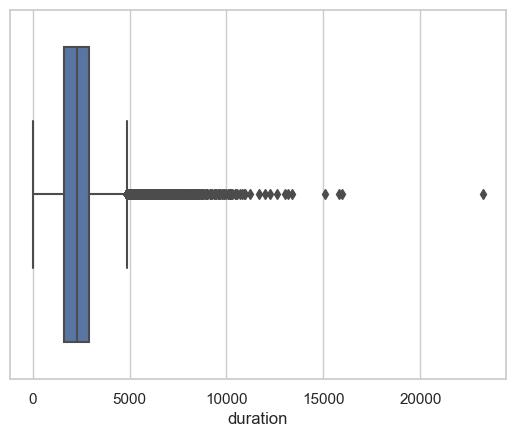

In [62]:
duration = df['duration']
sns.set(style="whitegrid")
ax = sns.boxplot(x=duration)
print(duration.describe())

#### Civilizaciones de los jugadores

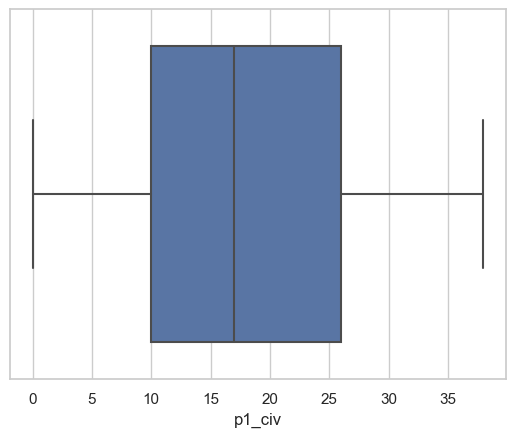

In [63]:
p1_civ = df['p1_civ']
sns.set(style="whitegrid")
ax = sns.boxplot(x=p1_civ)

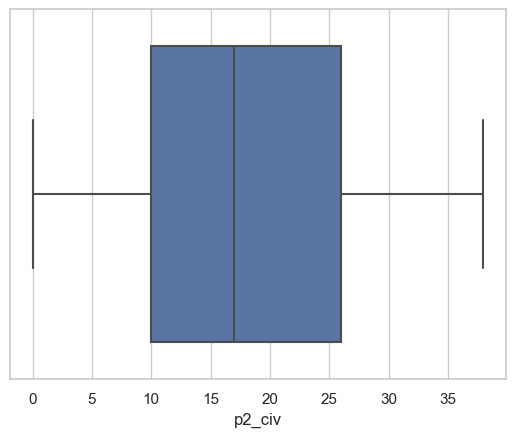

In [64]:
p2_civ = df['p2_civ']
sns.set(style="whitegrid")
ax = sns.boxplot(x=p2_civ)

* _Las variables de elo y duration presentan demasiados valores atípicos y por lo tanto se deben eliminar, so pena que se afecte el modelo_

#### Balanceo de los datos

In [65]:
from scipy.stats import mstats

df = pd.read_csv('./aoe_data_clean.csv')

def winsorize_data(data, lower_percentile, upper_percentile):
    # Calculate the values corresponding to the lower and upper percentiles
    lower_limit = lower_percentile / 100
    upper_limit = upper_percentile / 100

    # Winsorize the data using lower and upper limits
    winsorized_data = mstats.winsorize(data, limits=(lower_limit, upper_limit))

    return winsorized_data

# Set the lower and upper percentiles for winsorization
lower_percentile = 10  # Example: replace values below the 1st percentile
upper_percentile = 90  # Example: replace values above the 99th percentile

# Apply winsorization to 'elo' and 'duration' variables
df['elo'] = winsorize_data(df['elo'].values, lower_percentile, upper_percentile)
df['duration'] = winsorize_data(df['duration'].values, lower_percentile, upper_percentile)


count    224599.0
mean        904.5
std           0.0
min         904.5
25%         904.5
50%         904.5
75%         904.5
max         904.5
Name: elo, dtype: float64


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


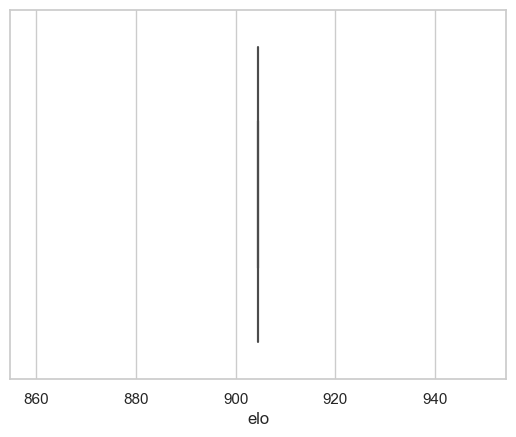

In [66]:
elo = df['elo']
sns.set(style="whitegrid")
ax = sns.boxplot(x=elo)
print(elo.describe())

c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    224599.0
mean       1028.0
std           0.0
min        1028.0
25%        1028.0
50%        1028.0
75%        1028.0
max        1028.0
Name: duration, dtype: float64


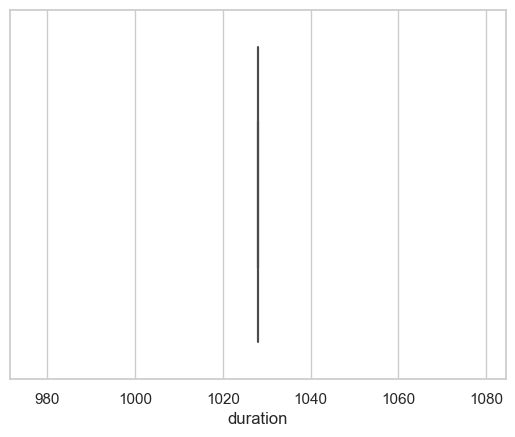

In [67]:
duration = df['duration']
sns.set(style="whitegrid")
ax = sns.boxplot(x=duration)
print(duration.describe())

In [68]:
# Prepare your dataset and split into features and target variable
X = df[['elo', 'duration', 'p1_civ', 'p2_civ']]
y = df['winner']

# Split the dataset into training and testing sets - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Exploración de hipermarametros

In [69]:
dummy = LogisticRegression()

params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
    }

x_subSample = X_train.sample(frac=0.05, random_state=42)
y_subSample = y_train.sample(frac=0.05, random_state=42)

lr_grid = GridSearchCV(dummy, params, cv=5, verbose=1, n_jobs=-1)

In [70]:
lr_grid.fit(x_subSample, y_subSample)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Grid search results:")
print("---------------------")
results = lr_grid.cv_results_
print(lr_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Grid search results:
---------------------
{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\DIEGO\AppData\Local\Programs\Pyt

### Entrenamiento del modelo y métricas	

In [71]:
# Asignar pesos a las variables

weights = {
    'elo': 0.075,
    'duration': 0.025,
    'p1_civ': 0.45,
    'p2_civ': 0.45
}

x_train_w = X_train.copy()
X_test_w = X_test.copy()

for var, weight in weights.items():
    x_train_w[var] = x_train_w[var] * weight
    X_test_w[var] = X_test_w[var] * weight

In [72]:
# {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

recommender = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#recommender.fit(X_train, y_train)

# Utilize the weighted training data to fit the logistic regression model
recommender.fit(x_train_w, y_train)

y_pred = recommender.predict(X_test_w)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.5106411398040962
Recall: 0.9721447253705319
Precision: 0.5109751626798643
F1 Score: 0.6698606271777003


In [73]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  637, 21343],
       [  639, 22301]], dtype=int64)

In [74]:
# Drop rows where values are missing or NaN

df = df.dropna()

x = df[['p2_xpos', 'p1_ypos', 'p1_xpos']]
y = df['winner']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
recommender = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

recommender.fit(x_train, y_train)

y_pred = recommender.predict(x_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.5099647204504567
Recall: 1.0
Precision: 0.5099647204504567
F1 Score: 0.6754657424026738


In [76]:
confusion_matrix(y_test, y_pred)

array([[    0, 20974],
       [    0, 21827]], dtype=int64)

In [86]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('./aoe_data_clean.csv')

X = df[['elo', 'duration', 'p1_civ', 'p2_civ']]
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define class weights if needed
class_weights = {0: 1, 1: 10}  # Adjust the weights based on class imbalance

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weights)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Convert predictions to binary values
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))

Epoch 1/10
5615/5615 [==============================] - 13s 2ms/step - loss: 5.0798 - accuracy: 0.5086
Epoch 2/10
5615/5615 [==============================] - 10s 2ms/step - loss: 2.0963 - accuracy: 0.5094
Epoch 3/10
5615/5615 [==============================] - 10s 2ms/step - loss: 1.7958 - accuracy: 0.5094
Epoch 4/10
5615/5615 [==============================] - 10s 2ms/step - loss: 1.7239 - accuracy: 0.5093
Epoch 5/10
5615/5615 [==============================] - 10s 2ms/step - loss: 1.6828 - accuracy: 0.5093
Epoch 6/10
5615/5615 [==============================] - 9s 2ms/step - loss: 1.6698 - accuracy: 0.5093
Epoch 7/10
5615/5615 [==============================] - 9s 2ms/step - loss: 1.6647 - accuracy: 0.5093
Epoch 8/10
5615/5615 [==============================] - 10s 2ms/step - loss: 1.6624 - accuracy: 0.5093
Epoch 9/10
5615/5615 [==============================] - 11s 2ms/step - loss: 1.6621 - accuracy: 0.5093
Epoch 10/10
1404/1404 [==============================] - 2s 1ms/step
Accura

## Trabajo de predicción

* _0_  -      Vikings
* _1_  -      Britons
* _2_  -      Chinese
* _3_  -       Mayans
* _4_  -      Berbers
* _5_  -        Khmer
* _6_  -       Cumans
* _7_  -         Huns
* _8_  -        Malay
* _9_  -   Ethiopians
* _10_  -      Magyars
* _11_  -       Franks
* _12_  -       Tatars
* _13_  -        Slavs
* _14_  -        Celts
* _15_  -      Mongols
* _16_  -      Teutons
* _17_  -      Koreans
* _18_  -       Aztecs
* _19_  -        Goths
* _20_  -        Turks
* _21_  -     Japanese
* _22_  -     Persians
* _23_  -      Indians
* _24_  -     Saracens
* _25_  -  Burgundians
* _26_  -   Bulgarians
* _27_  -   Byzantines
* _28_  -  Lithuanians
* _29_  -    Sicilians
* _30_  -      Malians
* _31_  -   Portuguese
* _32_  -      Spanish
* _33_  -   Vietnamese
* _34_  -     Italians
* _35_  -      Burmese
* _36_  -        Poles
* _37_  -        Incas
* _38_  -    Bohemians

In [79]:
civilizations = {
    0: 'Vikings',
    1: 'Britons',
    2: 'Chinese',
    3: 'Mayans',
    4: 'Berbers',
    5: 'Khmer',
    6: 'Cumans',
    7: 'Huns',
    8: 'Malay',
    9: 'Ethiopians',
    10: 'Magyars',
    11: 'Franks',
    12: 'Tatars',
    13: 'Slavs',
    14: 'Celts',
    15: 'Mongols',
    16: 'Teutons',
    17: 'Koreans',
    18: 'Aztecs',
    19: 'Goths',
    20: 'Turks',
    21: 'Japanese',
    22: 'Persians',
    23: 'Indians',
    24: 'Saracens',
    25: 'Burgundians',
    26: 'Bulgarians',
    27: 'Byzantines',
    28: 'Lithuanians',
    29: 'Sicilians',
    30: 'Malians',
    31: 'Portuguese',
    32: 'Spanish',
    33: 'Vietnamese',
    34: 'Italians',
    35: 'Burmese',
    36: 'Poles',
    37: 'Incas',
    38: 'Bohemians'
}

mean_elo = df['elo'].mean()
mean_duration = df['duration'].mean()


def is_numeric(value):
    return isinstance(value, int)


def recommend_civilization():
    civ = input("Introduzca la civilización del enemigo: ")
    if is_numeric(civ):
        civ = int(civ)
        if civ in civilizations:
            mayor = 0
            civ_mayor = 0
            for key, value in civilizations.items():
                likelihood_of_winning = recommender.predict_proba([[mean_elo, mean_duration, key, civ]])[0][1]
                if likelihood_of_winning > mayor:
                    mayor = likelihood_of_winning
                    civ_mayor = key
            recommended_civ = civilizations[civ_mayor]
            print("Civilización recomendada: {}".format(recommended_civ))
        else:
            print("Civilización no válida")
    else:
        print("Entrada no válida")


stop_flag = True

"""while stop_flag:
    print("Elija la opción que desee:")
    print("1. Recomendar civilización")
    print("2. Mostrar civilizaciones")
    print("3. Salir")
    option = input()
    if is_numeric(option):
        option = int(option)
        if option == 1:
            recommend_civilization()
        elif option == 2:
            for key, value in civilizations.items():
                print(key, value)
        elif option == 3:
            stop_flag = False
        else:
            print("Opción no válida")
    else:
        print("Opción no válida")"""


'while stop_flag:\n    print("Elija la opción que desee:")\n    print("1. Recomendar civilización")\n    print("2. Mostrar civilizaciones")\n    print("3. Salir")\n    option = input()\n    if is_numeric(option):\n        option = int(option)\n        if option == 1:\n            recommend_civilization()\n        elif option == 2:\n            for key, value in civilizations.items():\n                print(key, value)\n        elif option == 3:\n            stop_flag = False\n        else:\n            print("Opción no válida")\n    else:\n        print("Opción no válida")'